In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from google.colab import files
uploaded = files.upload()

import zipfile
with zipfile.ZipFile("sample_data_check.zip", "r") as zip_ref:
    zip_ref.extractall("sample_data_check")


Saving sample_data_check.zip to sample_data_check.zip


In [4]:
df = pd.read_csv("sample_data_check/oasis_cross-sectional.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None


In [6]:
print(df.describe())

              Age        Educ         SES       MMSE         CDR         eTIV  \
count  436.000000  235.000000  216.000000  235.00000  235.000000   436.000000   
mean    51.357798    3.178723    2.490741   27.06383    0.285106  1481.919725   
std     25.269862    1.311510    1.120593    3.69687    0.383405   158.740866   
min     18.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     23.000000    2.000000    2.000000   26.00000    0.000000  1367.750000   
50%     54.000000    3.000000    2.000000   29.00000    0.000000  1475.500000   
75%     74.000000    4.000000    3.000000   30.00000    0.500000  1579.250000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF     Delay  
count  436.000000  436.000000  20.00000  
mean     0.791670    1.198894  20.55000  
std      0.059937    0.128682  23.86249  
min      0.644000    0.881000   1.00000  
25%      0.742750    1.111750   2.75000  
50%      0.809000 

In [7]:
print(df.isnull().sum())


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [8]:
print(df.columns)
print(df)


Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')
                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_

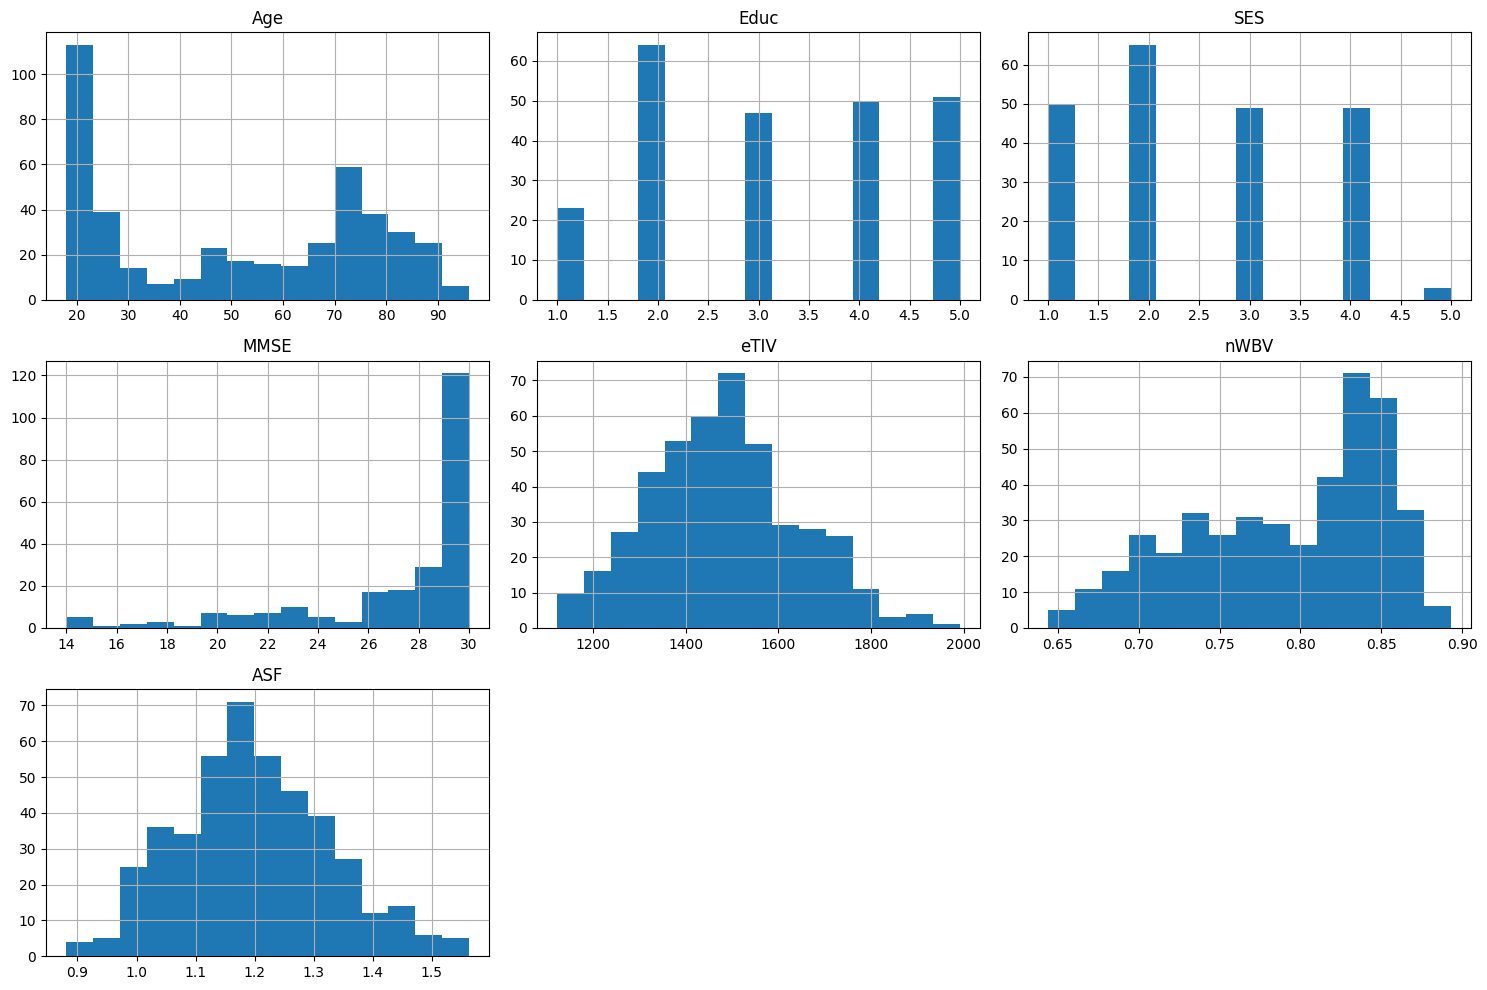

In [9]:
numerical_cols = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [10]:
#to merge a ICD 10 code file
from google.colab import files
uploaded_excel=files.upload()


Saving archive.zip to archive.zip


In [11]:
import zipfile
import io
import pandas as pd
zip_file_name = 'archive.zip'
with zipfile.ZipFile(io.BytesIO(uploaded_excel[zip_file_name]), 'r') as zip_ref:
    extracted_file_name = zip_ref.namelist()[0]
    zip_ref.extractall(".")
if extracted_file_name.endswith('.xlsx') or extracted_file_name.endswith('.xls') or extracted_file_name.endswith('.csv'):
    if extracted_file_name.endswith('.xlsx') or extracted_file_name.endswith('.xls'):
        df_icd = pd.read_excel(extracted_file_name)
    elif extracted_file_name.endswith('.csv'):
        df_icd = pd.read_csv(extracted_file_name)
    print(f"Successfully loaded '{extracted_file_name}' into df_icd.")
    print("\nFirst 10 rows of the ICD-10 DataFrame:")
    display(df_icd.head())
    print("\nColumn information for the ICD-10 DataFrame:")
    print(df_icd.info())
    print("\nMissing values in the ICD-10 DataFrame:")
    print(df_icd.isnull().sum())
else:
    print(f"Error: The extracted file '{extracted_file_name}' does not appear to be an Excel or CSV file.")


Successfully loaded 'ICD10codes.csv' into df_icd.

First 10 rows of the ICD-10 DataFrame:


,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae","Cholera due to Vibrio cholerae 01, biovar cholerae.1",Cholera
0,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
1,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
2,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
3,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever
4,A010,2,A0102,Typhoid fever with heart involvement,Typhoid fever with heart involvement,Typhoid fever



Column information for the ICD-10 DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71703 entries, 0 to 71702
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   A00                                                   71703 non-null  object
 1   0                                                     69498 non-null  object
 2   A000                                                  71703 non-null  object
 3   Cholera due to Vibrio cholerae 01, biovar cholerae    71703 non-null  object
 4   Cholera due to Vibrio cholerae 01, biovar cholerae.1  71703 non-null  object
 5   Cholera                                               71703 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB
None

Missing values in the ICD-10 DataFrame:
A00                                                        0
0                                          

In [12]:
#preprocessing the data
cols_to_impute_median = ['Educ', 'SES', 'MMSE', 'CDR']
for col in cols_to_impute_median:
    df[col].fillna(df[col].median(), inplace=True)
df.drop('Delay', axis=1, inplace=True)
print("Missing values after imputation and dropping 'Delay' column:")
print(df.isnull().sum())


Missing values after imputation and dropping 'Delay' column:
ID      0
M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64


/tmp/ipython-input-4082035001.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
print(f"Number of duplicate rows before dropping: {df_icd.duplicated().sum()}")
df_icd.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df_icd.duplicated().sum()}")
print("\nDataFrame after removing duplicates:")
display(df_icd.head())


Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0

DataFrame after removing duplicates:


,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae","Cholera due to Vibrio cholerae 01, biovar cholerae.1",Cholera
0,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
1,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
2,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
3,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever
4,A010,2,A0102,Typhoid fever with heart involvement,Typhoid fever with heart involvement,Typhoid fever


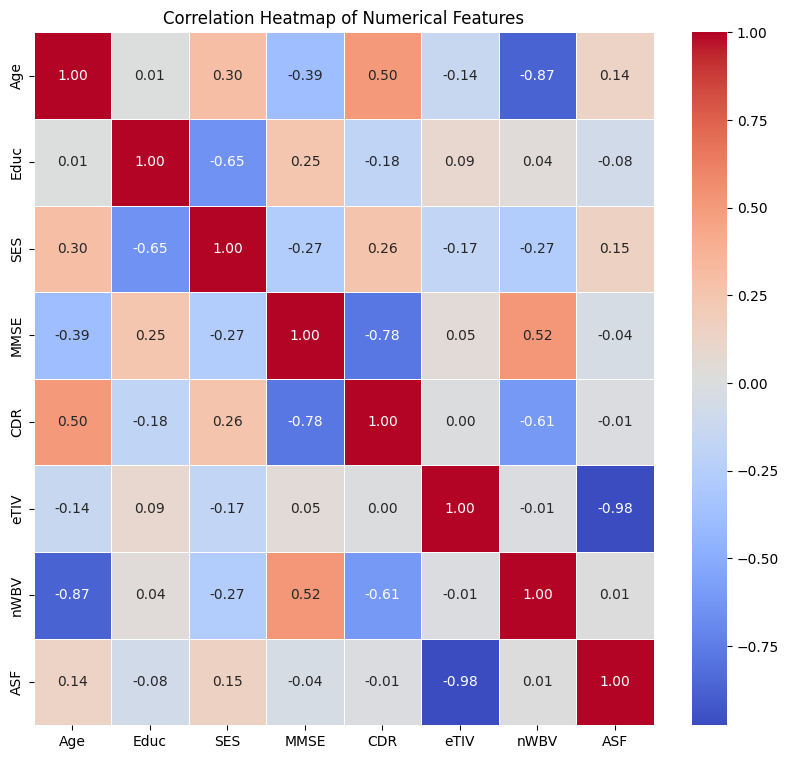

In [14]:
#visualisation through correaltion heat map
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



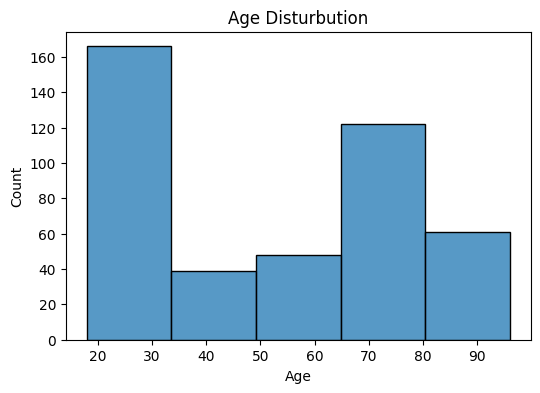

In [15]:
#histoplot visualisation
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins= 5)
plt.title('Age Disturbution')
plt.show()


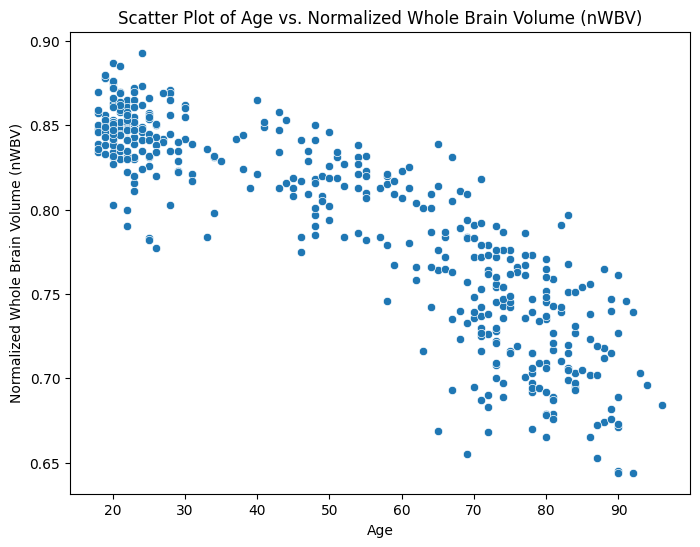

In [16]:
#scatter plot visualisation of Age vs nWBV
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='nWBV', data=df)
plt.title('Scatter Plot of Age vs. Normalized Whole Brain Volume (nWBV)')
plt.xlabel('Age')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.show()


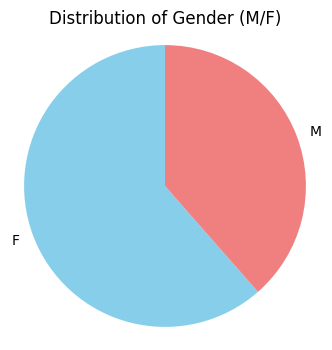

In [17]:
gender_counts = df['M/F'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender (M/F)')
plt.axis('equal')
plt.show()


In [18]:
#standardising the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=np.number).columns
non_numerical_cols = df.select_dtypes(exclude=np.number).columns
print("Numerical columns:", numerical_cols.tolist())
print("Non-numerical columns:", non_numerical_cols.tolist())
df_numerical = df[numerical_cols]
df_non_numerical = df[non_numerical_cols]
print("\nNumerical DataFrame head:")
display(df_numerical.head())
print("\nNon-Numerical DataFrame head:")
display(df_non_numerical.head())


Numerical columns: ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
Non-numerical columns: ['ID', 'M/F', 'Hand']

Numerical DataFrame head:


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,28,3.0,2.0,29.0,0.0,1588,0.803,1.105
4,18,3.0,2.0,29.0,0.0,1737,0.848,1.010



Non-Numerical DataFrame head:


,ID,M/F,Hand
0,OAS1_0001_MR1,F,R
1,OAS1_0002_MR1,F,R
2,OAS1_0003_MR1,F,R
3,OAS1_0004_MR1,M,R
4,OAS1_0005_MR1,M,R


In [19]:
#for patient details
from google.colab import files
uploaded = files.upload()


Saving patient_records_heartattackdataset.zip to patient_records_heartattackdataset.zip


In [35]:
print("Data types of columns in df:")
print(df.dtypes)


Data types of columns in df:
ID       object
M/F      object
Hand     object
Age       int64
Educ    float64
SES     float64
MMSE    float64
CDR     float64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object


In [39]:
import zipfile
import io
zip_file_name = 'patient_records_heartattackdataset.zip'

In [50]:
#lab reports dataset
from google.colab import files
uploaded = files.upload()


Saving Lab_reports_dataset.zip to Lab_reports_dataset.zip


In [51]:
import zipfile
import io
import pandas as pd
zip_file_name = 'Lab_reports_dataset.zip'
dataset_file_name = 'Dataset/CVD_Vital_SIgns.csv'
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extract(dataset_file_name, path=".")
    print(f"Extracted: {dataset_file_name}")
if dataset_file_name.endswith('.xlsx') or dataset_file_name.endswith('.xls') or dataset_file_name.endswith('.csv'):
    full_path = f"./{dataset_file_name}"
    if dataset_file_name.endswith('.xlsx') or dataset_file_name.endswith('.xls'):
        df_lab_reports = pd.read_excel(full_path)
    elif dataset_file_name.endswith('.csv'):
        df_lab_reports = pd.read_csv(full_path)
    print(f"\nSuccessfully loaded '{dataset_file_name}' into df_lab_reports.")
    print("\nFirst 5 rows of the lab reports DataFrame:")
    display(df_lab_reports.head())
    print("\nColumn information for the lab reports DataFrame:")
    print(df_lab_reports.info())
    print("\nMissing values in the lab reports DataFrame:")
    print(df_lab_reports.isnull().sum())
else:
    print(f"Error: The extracted file '{dataset_file_name}' does not appear to be an Excel or CSV file.")


Extracted: Dataset/CVD_Vital_SIgns.csv

Successfully loaded 'Dataset/CVD_Vital_SIgns.csv' into df_lab_reports.

First 5 rows of the lab reports DataFrame:


,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
0,94297,200697.0,93.0,94.0,98.0,39.0,36.0,1
1,94229,219381.0,97.0,96.0,98.0,16.0,36.5,0
2,94195,276193.0,82.0,96.0,97.0,25.0,36.3,1
3,94256,241577.0,98.0,196.0,96.0,16.0,36.5,1
4,93996,236789.0,98.0,92.0,99.0,28.0,37.2,1



Column information for the lab reports DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         23468 non-null  int64  
 1   icustay_id         23468 non-null  float64
 2   heart_rate         23468 non-null  float64
 3   blood_pressure     23468 non-null  float64
 4   oxygen_saturation  23468 non-null  float64
 5   respiratory_rate   23468 non-null  float64
 6   temperature        23468 non-null  float64
 7   Label              23468 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB
None

Missing values in the lab reports DataFrame:
subject_id           0
icustay_id           0
heart_rate           0
blood_pressure       0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64


In [52]:
print("Data types and non-null counts:")
print(df_lab_reports.info())
print("\nMissing values per column:")
print(df_lab_reports.isnull().sum())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         23468 non-null  int64  
 1   icustay_id         23468 non-null  float64
 2   heart_rate         23468 non-null  float64
 3   blood_pressure     23468 non-null  float64
 4   oxygen_saturation  23468 non-null  float64
 5   respiratory_rate   23468 non-null  float64
 6   temperature        23468 non-null  float64
 7   Label              23468 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB
None

Missing values per column:
subject_id           0
icustay_id           0
heart_rate           0
blood_pressure       0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64


In [53]:
print("Summary statistics for numerical columns:")
display(df_lab_reports.describe())


Summary statistics for numerical columns:


,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
count,23468.000000,23468.000000,2.346800e+04,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000
mean,62366.052114,250133.301176,5.187781e+02,104.420999,97.317978,24.711991,37.903721,0.747145
std,24233.774938,28861.410223,6.527666e+04,21.025540,62.898965,11.262183,6.918300,0.434658
min,23.000000,200001.000000,7.000000e+00,-11.000000,9.000000,2.000000,-3.000000,0.000000
25%,46995.500000,225166.750000,9.000000e+01,93.000000,96.000000,16.000000,36.800000,0.000000
50%,64336.500000,250301.000000,9.400000e+01,98.000000,97.000000,25.000000,37.200000,1.000000
75%,82072.250000,275103.250000,9.700000e+01,110.000000,98.000000,30.000000,37.800000,1.000000
max,99999.000000,299998.000000,9.999999e+06,290.000000,9560.000000,914.000000,101.300000,1.000000


Creating histograms for numerical columns: ['subject_id', 'icustay_id', 'heart_rate', 'blood_pressure', 'oxygen_saturation', 'respiratory_rate', 'temperature', 'Label']


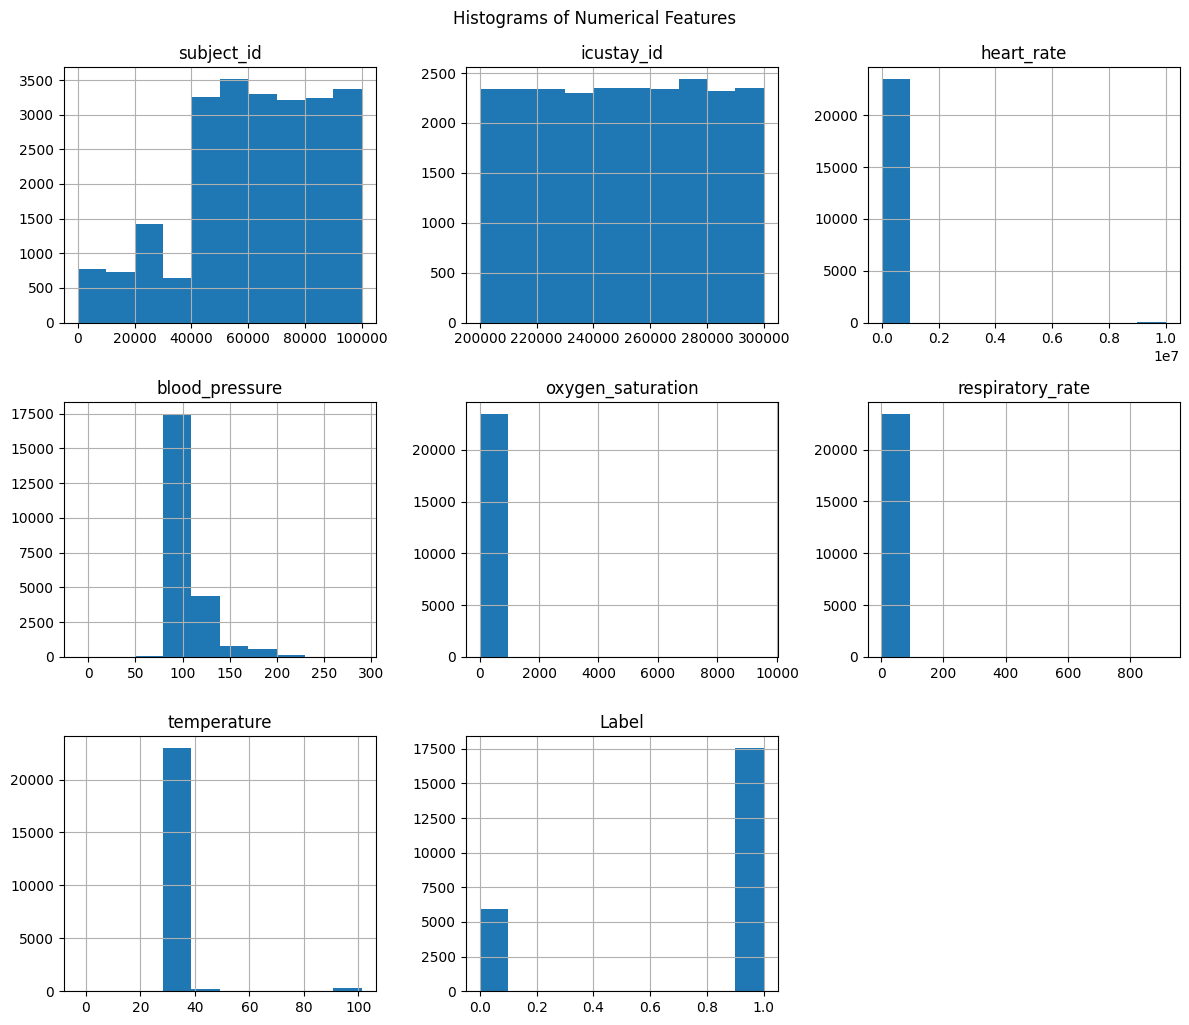

In [54]:
#creating histogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
numerical_cols = df_lab_reports.select_dtypes(include=np.number).columns.tolist()
print("Creating histograms for numerical columns:", numerical_cols)
df_lab_reports[numerical_cols].hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()


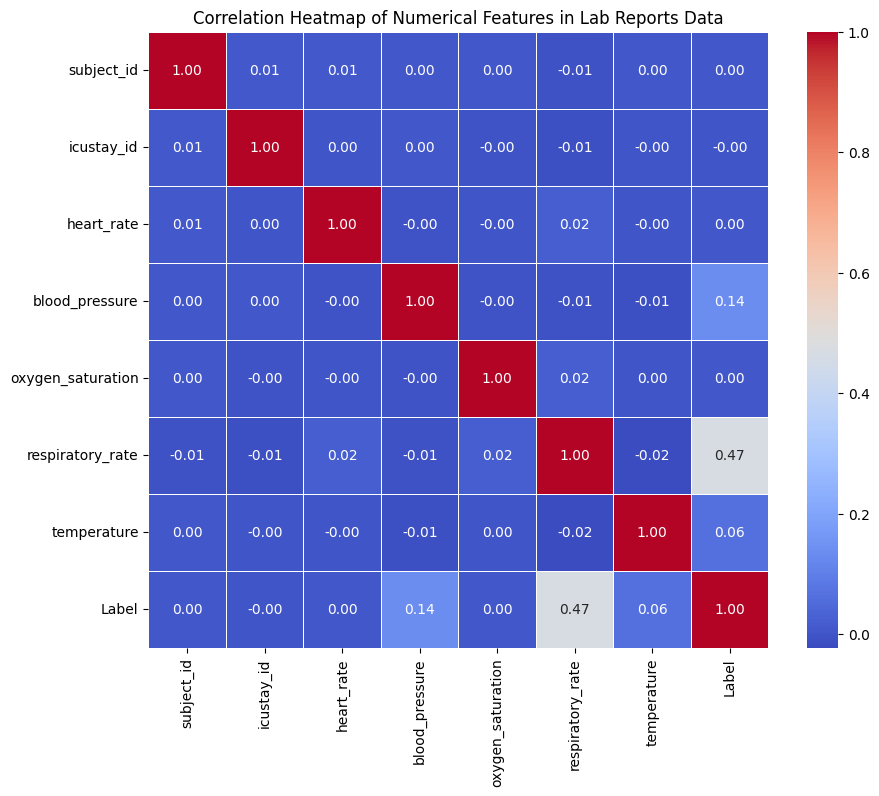

In [55]:
#correlation heat map
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df_lab = df_lab_reports.select_dtypes(include=['float64', 'int64'])
correlation_matrix_lab = numerical_df_lab.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_lab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features in Lab Reports Data')
plt.show()


In [56]:
df_lab_reports['heart_rate'] = df_lab_reports['heart_rate'].clip(upper=300)
df_lab_reports['blood_pressure'] = df_lab_reports['blood_pressure'].clip(lower=30, upper=250)
df_lab_reports['oxygen_saturation'] = df_lab_reports['oxygen_saturation'].clip(lower=50, upper=100)
df_lab_reports['respiratory_rate'] = df_lab_reports['respiratory_rate'].clip(lower=8, upper=60)
df_lab_reports['temperature'] = df_lab_reports['temperature'].clip(lower=30, upper=43)
print("Summary statistics after handling outliers:")
display(df_lab_reports.describe())





Summary statistics after handling outliers:


,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
count,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000
mean,62366.052114,250133.301176,92.623206,104.418186,96.765311,24.651525,37.227575,0.747145
std,24233.774938,28861.410223,9.521902,20.920548,1.581540,8.994120,0.948404,0.434658
min,23.000000,200001.000000,7.000000,30.000000,50.000000,8.000000,30.000000,0.000000
25%,46995.500000,225166.750000,90.000000,93.000000,96.000000,16.000000,36.800000,0.000000
50%,64336.500000,250301.000000,94.000000,98.000000,97.000000,25.000000,37.200000,1.000000
75%,82072.250000,275103.250000,97.000000,110.000000,98.000000,30.000000,37.800000,1.000000
max,99999.000000,299998.000000,300.000000,250.000000,100.000000,60.000000,43.000000,1.000000
